In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv("datasets/gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Correlation:
1. Postitive Correlation
2. Negative Correlation

In [4]:
correlation = gold_data.corr()

C:\Users\sampr\AppData\Local\Temp\ipykernel_11336\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

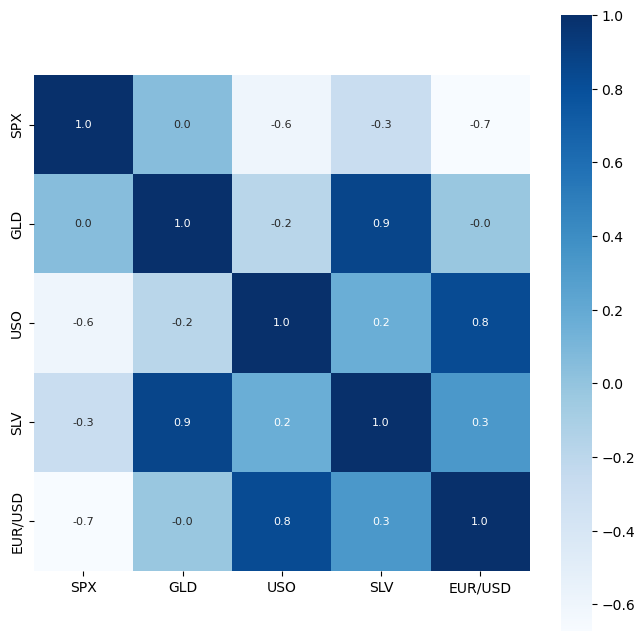

In [5]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [6]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sampr\AppData\Local\Temp\ipykernel_11336\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

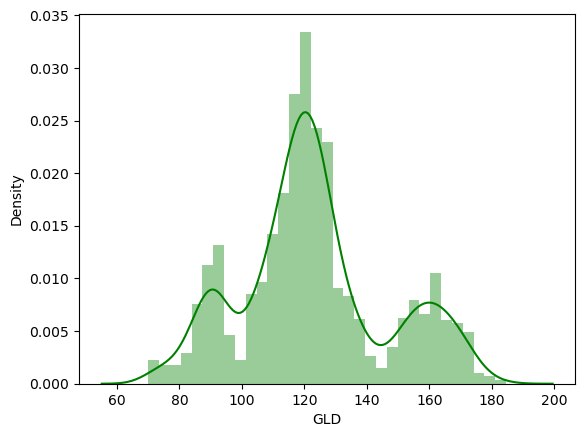

In [7]:
sns.distplot(gold_data['GLD'],color='green')

In [8]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [10]:
regressor = RandomForestRegressor(n_estimators=100)

In [11]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [12]:
test_data_prediction = regressor.predict(X_test)

In [13]:
print(test_data_prediction)

[168.66350033  82.21860007 116.08100014 127.45090076 120.70650139
 154.83819745 150.2653988  126.09140027 117.44239896 126.0300006
 116.81470087 171.85690111 141.93199923 167.70839814 115.18609998
 117.66510038 137.76800337 170.32680118 159.72080287 157.1181998
 154.93510033 125.36250027 175.85779945 157.2741034  125.28850028
  93.75699959  77.7251001  120.31300003 119.04809894 167.44979934
  88.1242006  125.3481      91.06990086 117.67089996 120.99229947
 136.25160104 115.38230115 115.46930089 147.48319996 107.28770108
 104.4385024   87.15919778 126.57370074 118.22640004 153.01509891
 119.60310001 108.34769972 108.09879827  93.02560015 127.22579741
  74.98860025 113.61129965 121.40930024 111.31179925 118.80969905
 120.32899989 159.65809919 168.14240095 146.835397    85.88689872
  94.45980021  86.85019891  90.4657003  118.91320107 126.4174005
 127.70380044 171.07369963 122.21569939 117.48329915  98.4364005
 168.55110201 142.91689857 132.34280264 121.0477025  121.1925994
 119.59990084 1

In [14]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889940498215516


Compare the Actual values and the predicted values

In [15]:
Y_test = list(Y_test)

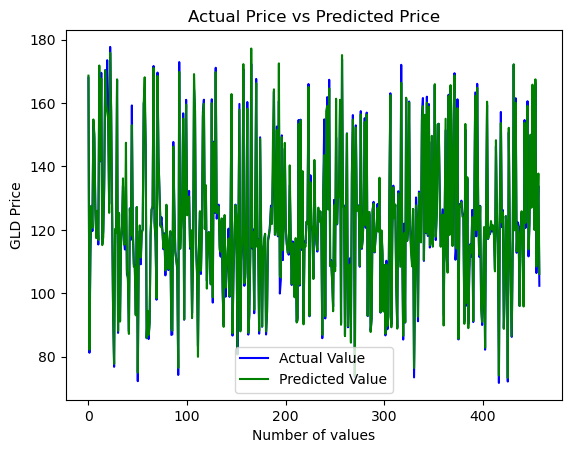

In [16]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()